# Import nltk tools

In [742]:
import pandas as pd
import numpy as np

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Switch area
SUBJECT = 'material_garment'
VOCAB_SIZE = 900

# Wrod processing

In [743]:
data = pd.read_csv('Matrix/' + SUBJECT + '_matrix.csv')

* Name the index as "MATERIAL_IDs"
* The matrix must has it unrepeated Id before import to here, show as the "Unnamed: 0".

In [744]:
data.head()

,Unnamed: 0,material,material_garment
0,0,", , lm792, shell fabric at hood, above chest, ...",1
1,1,", , sotl085-pu01, shell fabric at hood, above ...",1
2,2,", , lm792, shell fabric at mid chest panels, ,...",1
3,3,", , sotl085-pu01, shell fabric at mid chest pa...",1
4,4,", , ym11-3527, stretch mesh , , , , back pocke...",1


* Change the col "Unnamed: 0" as "MATERIAL_ID"

In [745]:
data.rename( columns = {'Unnamed: 0': 'MATERIAL_ID'}, inplace = True)

In [746]:
data.head()

,MATERIAL_ID,material,material_garment
0,0,", , lm792, shell fabric at hood, above chest, ...",1
1,1,", , sotl085-pu01, shell fabric at hood, above ...",1
2,2,", , lm792, shell fabric at mid chest panels, ,...",1
3,3,", , sotl085-pu01, shell fabric at mid chest pa...",1
4,4,", , ym11-3527, stretch mesh , , , , back pocke...",1


* Set the original index as Index

In [747]:
data.set_index('MATERIAL_ID', inplace = True)

In [748]:
data.tail()

,material,material_garment
MATERIAL_ID,,
14212,", VELCRO SUPPLIER/ REFERENCE NUMBER LOCATION A...",0
14213,", THREAD SPI SUPPLIER/ REF NUMBER AMOUNT, , , ...",0
14214,", LABELS SUPPLIER/ REFERENCE NUMBER LOCATION ...",0
14215,", HANG TAGS SUPPLIER/ REFERENCE NUMBER LOCATIO...",0
14216,", CARE AND CONTENT LABELS SUPPLIER/ REFERENCE ...",0


## Nltk Function

In [749]:
def nltk_convert(col_of_df):
    '''
    Parameter of this function is a column of a dataFrame.
    
    '''
    # difine Stop words
    stop_words = set(stopwords.words('english'))
    # Difine Stemmer
    stemmer = SnowballStemmer('english')
    
    # converts to lower case and splits up the words
    words = word_tokenize(col_of_df)
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        # if word is not in the stop_words list and is not a alpha.
        if word not in stop_words and word.isalpha():
#             filtered_words.append(stemmer.stem(word))
            filtered_words.append(word)
            
    return filtered_words

* Test the function, with row 0, in column 'material'

In [750]:
nltk_convert(data.at[0, 'material'])

['shell',
 'fabric',
 'hood',
 'chest',
 'lower',
 'front',
 'body',
 'back',
 'body',
 'sleeves',
 'facing',
 'fabric',
 'windflap',
 'hood',
 'shockcord',
 'tunnel',
 'self',
 'fabric',
 'seam',
 'binding',
 'needed',
 'shockcord',
 'tunnel']

## Applying to the matrix
* the variable "nested_list" will hold the result.
* It is a series in this moment.

In [751]:
%%time
nested_list = data.material.apply(nltk_convert)

CPU times: user 3.85 s, sys: 338 ms, total: 4.19 s
Wall time: 4.22 s


In [752]:
type(nested_list)

pandas.core.series.Series

## True and False categories
* Exact the index of fabric materials, and non fabric materials

In [753]:
material_ids_ctg_1 = data[data[SUBJECT] == 1].index
material_ids_ctg_0 = data[data[SUBJECT] ==0].index

In [754]:
material_ids_ctg_1

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            13363, 13380, 13392, 13409, 13421, 13438, 13450, 13467, 13479,
            13496],
           dtype='int64', name='MATERIAL_ID', length=10156)

### Get materials back by index
* Exact the strings in col 'material' by the index of doc_ids_fabric

In [755]:
nested_list_ctg_1 = nested_list.loc[material_ids_ctg_1]

In [756]:
nested_list_ctg_1

MATERIAL_ID
0        [shell, fabric, hood, chest, lower, front, bod...
1        [shell, fabric, hood, chest, lower, front, bod...
2                      [shell, fabric, mid, chest, panels]
3                      [shell, fabric, mid, chest, panels]
4                       [stretch, mesh, back, pocket, bag]
                               ...                        
13438    [INSULATION, PINNECO, MANTLE, HOOD, SLEEVES, B...
13450    [INSULATION, PINNECO, MANTLE, HOOD, SLEEVES, B...
13467    [INSULATION, PINNECO, MANTLE, HOOD, SLEEVES, B...
13479    [INSULATION, PINNECO, MANTLE, HOOD, SLEEVES, B...
13496    [INSULATION, PINNECO, MANTLE, HOOD, SLEEVES, B...
Name: material, Length: 10156, dtype: object

* by the index of doc_ids_trim

In [757]:
nested_list_ctg_0 = nested_list.loc[material_ids_ctg_0]

In [758]:
nested_list_ctg_0.shape[0]

4061

## Number of Distinct words
* The Ctg_1

In [759]:
flat_list_ctg_1 =[item for sublist in nested_list_ctg_1 for item in sublist]

In [760]:
ctg_1_words = pd.Series(flat_list_ctg_1).value_counts()

In [761]:
ctg_1_words.shape

(1440,)

* The Ctg_0

In [762]:
flat_list_ctg_0 = [item for sublist in nested_list_ctg_0 for item in sublist]

In [763]:
ctg_0_words = pd.Series(flat_list_ctg_0).value_counts()

In [764]:
ctg_0_words.head()

NUMBER       1433
LOCATION     1204
REFERENCE    1182
AMOUNT        842
SEAM          445
dtype: int64

# Generate Vocabulary
## Top 10 words in Matrix (ctg_1 and ctg_0)

* It is same as function the nltk_convert, the difference is in the end of the funciton, it not append word directly, but word converted by function stemmer.stem.

In [765]:
def stemmered_nltk_convert(col_of_df):
    '''
    Parameter of this function is a column of a dataFrame.
    
    '''
    # difine Stop words
    stop_words = set(stopwords.words('english'))
    # Difine Stemmer
    stemmer = SnowballStemmer('english')
    
    # converts to lower case and splits up the words
    words = word_tokenize(col_of_df)
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        # if word is not in the stop_words list and is not a alpha.
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
            
    return filtered_words

In [766]:
%%time
stemmed_nested_list = data.material.apply(stemmered_nltk_convert)

CPU times: user 5.07 s, sys: 320 ms, total: 5.39 s
Wall time: 5.4 s


* Get flat list for all words

In [767]:
flat_stemmed_nested_list = [item for sublist in stemmed_nested_list for item in sublist]

* Turn it to a series

In [768]:
unique_words = pd.Series(flat_stemmed_nested_list).value_counts()

In [769]:
unique_words

pocket      2306
zipper      1888
label       1798
number      1574
locat       1563
            ... 
etc            1
bone           1
suggest        1
powermet       1
dxtpu          1
Length: 1250, dtype: int64

* Set the size of vacabulary
* This size need to be tested a lot, in this cace, follow the e-mail processing lecture, I takes 10 % of total particular words

In [770]:
VOCAB_SIZE

900

In [771]:
frequent_words = unique_words[0:VOCAB_SIZE]

In [772]:
print('Most common words: \n', frequent_words[:10])

Most common words: 
 pocket    2306
zipper    1888
label     1798
number    1574
locat     1563
seam      1472
refer     1261
front     1244
back      1099
left      1099
dtype: int64


## Create Vocabulary with WORD_ID

In [773]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index = word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,pocket
1,zipper
2,label
3,number
4,locat


* Save the vocabulary

In [774]:
vocab.to_csv('Matrix/'+SUBJECT+'_vocabulary.csv')

* Test the any word to see if it is in the vocabulary

In [775]:
'hangtag' in set(vocab.VOCAB_WORD)

True

## Search out the material with most token

In [776]:
clean_material_lengths = [len(sublist) for sublist in stemmed_nested_list]
print('Nr wrods in the longest material:', max(clean_material_lengths))

Nr wrods in the longest material: 71


In [777]:
print('Material position in the list', np.argmax(clean_material_lengths))

Material position in the list 10164


In [778]:
stemmed_nested_list[np.argmax(clean_material_lengths)]

['local',
 'sourc',
 'item',
 'must',
 'compli',
 'with',
 'cpsia',
 'test',
 'lead',
 'third',
 'parti',
 'must',
 'contain',
 'less',
 'ppm',
 'lead',
 'test',
 'result',
 'must',
 'submit',
 'approv',
 'sierra',
 'design',
 'develop',
 'team',
 'must',
 'submit',
 'sierra',
 'design',
 'apparel',
 'develop',
 'team',
 'approv',
 'prior',
 'use',
 'trim',
 'card',
 'pleas',
 'submit',
 'complet',
 'trim',
 'card',
 'prior',
 'sms',
 'product',
 'approv',
 'item',
 'substitut',
 'sms',
 'must',
 'clear',
 'note',
 'trim',
 'card',
 'pleas',
 'submit',
 'complet',
 'trim',
 'card',
 'prior',
 'bulk',
 'product',
 'approv',
 'this',
 'trim',
 'card',
 'must',
 'repres',
 'actual',
 'bulk',
 'materi']

# Generate Features & Spare Matrix
### Creating a DataFrame with one word per column

In [779]:
type(stemmed_nested_list)

pandas.core.series.Series

In [780]:
stemmed_nested_list

MATERIAL_ID
0        [shell, fabric, hood, chest, lower, front, bod...
1        [shell, fabric, hood, chest, lower, front, bod...
2                       [shell, fabric, mid, chest, panel]
3                       [shell, fabric, mid, chest, panel]
4                       [stretch, mesh, back, pocket, bag]
                               ...                        
14212               [velcro, refer, number, locat, amount]
14213                   [thread, spi, ref, number, amount]
14214                [label, refer, number, locat, amount]
14215            [hang, tag, refer, number, locat, amount]
14216    [care, and, content, label, refer, number, loc...
Name: material, Length: 14217, dtype: object

In [781]:
type(stemmed_nested_list.tolist())

list

In [782]:
word_col_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_col_df

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,shell,fabric,hood,chest,lower,front,bodi,back,bodi,sleev,...,None,None,None,None,None,None,None,None,None,None
1,shell,fabric,hood,chest,lower,front,bodi,back,bodi,sleev,...,None,None,None,None,None,None,None,None,None,None
2,shell,fabric,mid,chest,panel,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,shell,fabric,mid,chest,panel,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,stretch,mesh,back,pocket,bag,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14212,velcro,refer,number,locat,amount,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
14213,thread,spi,ref,number,amount,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
14214,label,refer,number,locat,amount,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
14215,hang,tag,refer,number,locat,amount,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## Traning Set and Test Set
* Must import the method "train_test_split()" from sklearn

In [783]:
X_train, X_test, y_train, y_test = train_test_split(word_col_df, data[SUBJECT],
                                                    test_size = 0.3)

In [784]:
print('Nr of traning samples', X_train.shape[0])
print('Fraction of traning set', X_train.shape[0] / word_col_df.shape[0])

Nr of traning samples 9951
Fraction of traning set 0.6999366955053808


In [785]:
X_train.index.name = X_test.index.name = 'MATERIAL_ID'
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
10831,highlight,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
13918,season,winter,contractor,soluna,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2784,brand,monder,athlet,woven,label,center,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6643,embroideri,larg,x,hem,front,left,leg,None,None,None,...,None,None,None,None,None,None,None,None,None,None
14174,seam,seal,fulli,seam,tape,fit,regular,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [786]:
y_train.head()

MATERIAL_ID
10831    0
13918    0
2784     1
6643     1
14174    0
Name: material_garment, dtype: int64

## Sparse Matrix for the traning data
* Get vocabulary turned as an Index:

In [787]:
word_index = pd.Index(vocab.VOCAB_WORD)
word_index

Index(['pocket', 'zipper', 'label', 'number', 'locat', 'seam', 'refer',
       'front', 'back', 'left',
       ...
       'openingsnowskirt', 'newsiz', 'calvari', 'neat', 'spray', 'eyeletref',
       'complet', 'inseam', 'lenghtloc', 'foam'],
      dtype='object', name='VOCAB_WORD', length=900)

In [788]:
y_train.shape[0]

9951

### Sparse Matrix Function

In [789]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    Returns a sparse matrix as dataframe
    """
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'MATERIAL_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
                
    return pd.DataFrame(dict_list)

## Training data
### Applying to the traning set

In [790]:
%%time
sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)

CPU times: user 4.08 s, sys: 25.6 ms, total: 4.1 s
Wall time: 4.13 s


In [791]:
sparse_train_df

,LABEL,MATERIAL_ID,OCCURENCE,WORD_ID
0,0,10831,1,351
1,0,13918,1,81
2,0,13918,1,88
3,0,13918,1,124
4,0,13918,1,123
...,...,...,...,...
61478,1,9490,1,98
61479,1,9490,1,11
61480,1,9490,1,236
61481,1,9490,1,98


In [792]:
sparse_train_df.shape

(61483, 4)

### Group by the DOC_ID

In [793]:
train_grouped = sparse_train_df.groupby(['MATERIAL_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped

OCCURENCE
MATERIAL_ID WORD_ID LABEL           
1           5       1              1
            7       1              1
            8       1              1
            10      1              2
            14      1              3
...                              ...
14216       6       0              1
            13      0              1
            16      0              1
            82      0              1
            161     0              1

[57729 rows x 1 columns]

* Distribute the DOC_ID to each row

In [794]:
train_grouped = train_grouped.reset_index()

In [795]:
train_grouped

,MATERIAL_ID,WORD_ID,LABEL,OCCURENCE
0,1,5,1,1
1,1,7,1,1
2,1,8,1,1
3,1,10,1,2
4,1,14,1,3
...,...,...,...,...
57724,14216,6,0,1
57725,14216,13,0,1
57726,14216,16,0,1
57727,14216,82,0,1


### Save Traning Data
* We save it as a txt file, with only numbers of the IDs, Occurances, label, as showed above. 

In [796]:
np.savetxt('Training Data/' + SUBJECT + '_sparse_traning_data', train_grouped, fmt = '%d')

## Test Data
* The way to create it is basically same way as treating traning data.

In [797]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
7333,grommet,mm,larg,back,hood,cord,exit,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6437,clear,zip,tie,line,locket,loop,attach,hang,tag,None,...,None,None,None,None,None,None,None,None,None,None
2715,size,label,insid,joke,label,sewn,center,main,label,None,...,None,None,None,None,None,None,None,None,None,None
6780,hang,tag,locat,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10462,cut,elast,web,taffeta,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [798]:
y_test.head()

MATERIAL_ID
7333     1
6437     1
2715     1
6780     1
10462    0
Name: material_garment, dtype: int64

In [799]:
%%time
sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)

CPU times: user 1.96 s, sys: 16.6 ms, total: 1.98 s
Wall time: 2.01 s


In [800]:
test_grouped = sparse_test_df.groupby(['MATERIAL_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped.head()

,MATERIAL_ID,WORD_ID,LABEL,OCCURENCE
0,0,5,1,1
1,0,7,1,1
2,0,8,1,1
3,0,10,1,2
4,0,14,1,3


In [801]:
np.savetxt('Training Data/' + SUBJECT + '_sparse_test_data', test_grouped, fmt = '%d')

# Full Matrix
* Create anempty df first

### Columns of Full Matrix
* The empty df with column 'DOC_ID', in the case I use 'MATERIAL_ID'
* Second column is 'CATEGORY'
* The rest column is number from 0 to the number of words in vocabulary.

In [802]:
column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))

### Rows of Full Matrix
* If consists of Material_ID in Training Data
* Numpy method np.unique() will take a number 1 time, even it occurs many time in the Traning Data.
* Import the traning data we saved as txt

In [803]:
TRANING_DATA = 'Training Data/' + SUBJECT + '_sparse_traning_data'

* Open it by Numpy

In [804]:
sparse_train_data = np.loadtxt(TRANING_DATA, delimiter = ' ', dtype=int)

In [805]:
index_names = np.unique(sparse_train_data[:, 0])

### Form the Data Frame
* Create an empty df, columned by column_names, indexed by index_names
* Fullfill all the cell with value "0"

In [806]:
full_train_data = pd.DataFrame(index= index_names, columns = column_names)
full_train_data.fillna(value = 0, inplace = True)
full_train_data.shape

(9931, 902)

## Make a Full matrix function

In [807]:
def make_full_matrix(sparse_matrix, nr_words, doc_idx = 0, word_idx = 1, cat_idx = 2, freq_idx = 3):
    column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
    doc_id_names = np.unique(sparse_matrix[:,0])
    full_matrix = pd.DataFrame(index = doc_id_names, columns = column_names)
    full_matrix.fillna(value=0, inplace=True)
    
    for i in range(sparse_matrix.shape[0]):
        doc_nr = sparse_matrix[i][doc_idx]
        word_id = sparse_matrix[i][word_idx]
        label = sparse_matrix[i][cat_idx]
        occurrence = sparse_matrix[i][freq_idx]
        
        full_matrix.at[doc_nr, 'MATERIAL_ID'] = doc_nr
        full_matrix.at[doc_nr, 'CATEGORY'] = label
        full_matrix.at[doc_nr, word_id] = occurrence
        
    full_matrix.set_index('MATERIAL_ID', inplace = True)
    return full_matrix

In [808]:
%%time
full_train_data = make_full_matrix(sparse_train_data, VOCAB_SIZE)

CPU times: user 3.73 s, sys: 142 ms, total: 3.88 s
Wall time: 3.74 s


In [809]:
full_train_data

,CATEGORY,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14210,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14212,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14213,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Probability of Category_1 in train_data

In [810]:
full_train_data.CATEGORY.size

9931

In [811]:
full_train_data.CATEGORY.sum()

7139

In [812]:
prob_ctg_1 = full_train_data.CATEGORY.sum() / full_train_data.CATEGORY.size
print('Probability  of ' + SUBJECT +' is', prob_ctg_1)

Probability  of material_garment is 0.7188601349310241


In [813]:
prob_ctg_1

0.7188601349310241

In [814]:
prob_ctg_1_in_train_data = pd.DataFrame({'prob_ctg_1_train_set':[prob_ctg_1]})

In [815]:
prob_ctg_1_in_train_data.to_csv('Training Data/' + SUBJECT + '_prob_ctg_1_in_train_data')

# Count each material in train_data have how many tokens
## Full train Features
* It is very simple. The whole df of train_data without the column 'CATEGORY' is the Full train Features
* Create a new df with no column 'CATEGORY'

In [816]:
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']

In [817]:
full_train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [818]:
# full_train_features[1249].sum()

### Number of tokens each material has in train_data
* We added up all values in row direction, to get sum of each row 

In [819]:
material_train_data = full_train_features.sum(axis = 1) 
material_train_data.shape # Show how many materials in train_data

(9931,)

In [820]:
material_train_data # Show how many words each material in train_data has

MATERIAL_ID
1        23
2         4
3         4
4         5
5         5
         ..
14210     5
14212     5
14213     5
14214     5
14216     8
Length: 9931, dtype: int64

* Total number of words in train_data

In [821]:
total_words_train_data = material_train_data.sum()
total_words_train_data

61483

#### Token of ctg_1 in train_data
* Number of particular words of category 1, in train_data
* The word can be called "token"

In [822]:
ctg_1_in_train_data = material_train_data[full_train_data.CATEGORY == 1]
ctg_1_in_train_data.shape
# 1379 materials in train_data is fabric

(7139,)

In [823]:
ctg_1_token_in_train_data = ctg_1_in_train_data.sum()
ctg_1_token_in_train_data
# The total words in Category 1, the fabric, in the train_data

47980

#### Token of trim in train_data
* Number of particular words of category 0, the trim, in train_data

In [824]:
ctg_0_in_train_data = material_train_data[full_train_data.CATEGORY == 0]
ctg_0_in_train_data.shape 
# Total, 5026 materials in train_data is trim

(2792,)

In [825]:
ctg_0_token_in_train_data = ctg_0_in_train_data.sum()
ctg_0_token_in_train_data 
# Total words in Category 0, the trim, in the train_data

13503

### Average number of words in fabric and trim
* In this case, CATEGORY 1 is fabric, 0 is trim

In [826]:
print('Average nr of words in ctg_1 {:.0f}'.format(ctg_1_token_in_train_data / ctg_1_in_train_data.shape[0]))
print('Average nr of words in ctg_0 {:.0f}'.format(ctg_0_token_in_train_data / ctg_0_in_train_data.shape[0]))

Average nr of words in ctg_1 7
Average nr of words in ctg_0 5


In [827]:
# The snippet is for testing if the calculating get problem.
# The answer should eaquls to 0
material_train_data.shape[0] - ctg_1_in_train_data.shape[0] - ctg_0_in_train_data.shape[0]

0

# Count each token's frequency in both Category
## Full train Features of ctg_1
* It is very simple. The df of train_data in 'CATEGORY'1, and without the column 'CATEGORY' is the Full train Features of Fabric

In [828]:
ctg_1_full_train_features = full_train_features.loc[full_train_data.CATEGORY == 1]

In [829]:
ctg_1_full_train_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Full train feature of trim

In [830]:
ctg_0_full_train_features = full_train_features.loc[full_train_data.CATEGORY == 0]

In [831]:
ctg_0_full_train_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
9996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14210,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14212,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14213,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Frequency of tokens in fabric in train_data
* We add up all value in column direction to get sum of each column.
* The sum represents each word occurs how many time in the category 1, the fabric.
* It is possible that some words in vocabulary never appear in this category, so we need "+ 1" to this token. Since later we'll divide it to get the percentage, if you divide 0, it may cause error.

In [832]:
summed_ctg_1_tokens_in_train_data = ctg_1_full_train_features.sum(axis = 0) + 1

In [833]:
summed_ctg_1_tokens_in_train_data

0      1593
1      1162
2      1064
3        73
4       262
       ... 
895       5
896       1
897       3
898       4
899       4
Length: 900, dtype: int64

### Frequency of tokens in trim in train_data
* The way treat it as treating with fabric

In [834]:
summed_ctg_0_tokens_in_train_data = ctg_0_full_train_features.sum(axis = 0) + 1

In [835]:
summed_ctg_0_tokens_in_train_data

0        28
1       189
2       189
3      1042
4       857
       ... 
895       1
896       3
897       1
898       1
899       1
Length: 900, dtype: int64

# Probability of tokens
* Why here not only divided the frequency of each token by total tokens but also the size of vocabulary? It is becasue we add "+ 1" for each word when counting frequency, so add the size of vocabulary is for balancing the number back.

## P of Training Set 
### Probability of tokens in fabric in train_data
* ### P( Token | ctg_1 )
* Take the each summed up occurance divided by the total nubmer of token in category of fabric.

In [836]:
prob_tokens_ctg_1_train_set = summed_ctg_1_tokens_in_train_data / (ctg_1_token_in_train_data + VOCAB_SIZE)

In [837]:
ctg_1_token_in_train_data

47980

In [838]:
prob_tokens_ctg_1_train_set

0      0.032590
1      0.023773
2      0.021768
3      0.001493
4      0.005360
         ...   
895    0.000102
896    0.000020
897    0.000061
898    0.000082
899    0.000082
Length: 900, dtype: float64

### Probability of tokens in trim in train_data
* ### P( Token | ctg_0 )

In [839]:
prob_tokens_ctg_0_train_set = summed_ctg_0_tokens_in_train_data / (ctg_0_token_in_train_data + VOCAB_SIZE)

In [840]:
prob_tokens_ctg_0_train_set

0      0.001944
1      0.013122
2      0.013122
3      0.072346
4      0.059501
         ...   
895    0.000069
896    0.000208
897    0.000069
898    0.000069
899    0.000069
Length: 900, dtype: float64

* Check if the number correct.
* The answer should be "1"

In [841]:
prob_tokens_ctg_0_train_set.sum()

1.0000000000000002

* Test for the prob

In [842]:
check = prob_tokens_ctg_1_train_set[196] > prob_tokens_ctg_0_train_set[196]
check

False

### Probability of tokens in train_data
* ### P (Token)

In [843]:
prob_tokens_all_train_set = full_train_features.sum(axis = 0) / total_words_train_data

In [844]:
prob_tokens_all_train_set

0      0.026332
1      0.021941
2      0.020347
3      0.018103
4      0.018168
         ...   
895    0.000065
896    0.000033
897    0.000033
898    0.000049
899    0.000049
Length: 900, dtype: float64

In [845]:
prob_tokens_all_train_set.sum()

1.0000000000000002

### Save the trained Model
* P( Token | ctg_1 )
* P( Token | ctg_0 )
* P ( Token )

In [846]:
np.savetxt('Training Data/' + SUBJECT + '_prob_tokens_ctg_1_in_train_data' ,prob_tokens_ctg_1_train_set)
np.savetxt('Training Data/' + SUBJECT + '_prob_tokens_ctg_0_in_train_data', prob_tokens_ctg_0_train_set)
np.savetxt('Training Data/' + SUBJECT + '_prob_tokens_all_in_train_data', prob_tokens_all_train_set)

## P of Test Set
### Probability of tokens in trim in train_data
* ### P( Token | ctg_0 )

* Start from Sparse Matrix of test_set
* Trun the Sparse Matrix to Full Matrix
* Get the number of word of material by summing each row of Full Matrix
* Get the frequency of each word by summing each column of Full Matrix
* Get all this result from test set : P ( Token | ctg_1 ), P (Token | ctg_0 ), P ( Token ) 
 

### Full matrix of test data
#### Import test data Sparse Matrix

In [847]:
TEST_DATA = 'Training Data/' + SUBJECT + '_sparse_test_data'
sparse_test_data = np.loadtxt(TEST_DATA, delimiter = ' ', dtype = int )

#### Create a empty Full Matrix
* Column and row of Full Matrix

In [848]:
column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
index_names = np.unique(sparse_test_data[:, 0]) # 1 material_id only for 1 row, without duplicated

#### The custom function make_full_matrix
* empty dataFrame for Full matrix 
* Filled the values from sparse matrix by column match to WORD_ID, the row match to MATERIAL_ID

In [849]:
%%time
full_test_data = make_full_matrix(sparse_test_data, VOCAB_SIZE) 

CPU times: user 2 s, sys: 77.4 ms, total: 2.08 s
Wall time: 1.96 s


In [850]:
full_test_data

,CATEGORY,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14208,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14209,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Probability in test data
#### Ctg_1

In [851]:
full_test_data.CATEGORY.size

4252

In [852]:
full_test_data.CATEGORY.sum()

3011

In [853]:
prob_ctg_1_test_data = full_test_data.CATEGORY.sum() / full_test_data.CATEGORY.size
print('Probability of ctg_1 in test_set', prob_ctg_1_test_data)

Probability of ctg_1 in test_set 0.708137347130762


### Full Features of test_set

In [854]:
full_test_features = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']

In [855]:
full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14208,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14209,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Number of tokens each material has in test_data

In [856]:
material_test_data = full_test_features.sum(axis = 1)
material_test_data[:5]

MATERIAL_ID
0     23
15     5
17     8
28     9
29    10
dtype: int64

* Total number of words in test_data

In [857]:
total_words_test_data = material_test_data.sum()
total_words_test_data

25917

#### Token of ctg_1 in test_data

In [858]:
ctg_1_in_test_data = material_test_data[full_test_data.CATEGORY == 1]
ctg_1_in_test_data.shape

(3011,)

In [859]:
ctg_1_token_in_test_data = ctg_1_in_test_data.sum()
ctg_1_token_in_test_data

19974

#### Token of ctg_0 in test_data

In [860]:
ctg_0_in_test_data = material_test_data[full_test_data.CATEGORY == 0]
ctg_0_in_test_data.shape

(1241,)

In [861]:
ctg_0_token_in_test_data = ctg_0_in_test_data.sum()
ctg_0_token_in_test_data

5943

#### Average number of words in fabric and trim in test_data

In [862]:
print('Average nr of words in ctg_1 {:.0f}'.format(ctg_1_token_in_test_data / ctg_1_in_test_data.shape[0]))
print('Average nr of words in ctg_0 {:.0f}'.format(ctg_0_token_in_test_data / ctg_0_in_test_data.shape[0]))

Average nr of words in ctg_1 7
Average nr of words in ctg_0 5


### Frequency of tokens in test_data
* Full feature of ctg_1 in test_data

In [863]:
ctg_1_full_test_features = full_test_features.loc[full_test_data.CATEGORY == 1]
ctg_1_full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Full feature of ctg_0 in test_data

In [864]:
ctg_0_full_test_features = full_test_features.loc[full_test_data.CATEGORY == 0]
ctg_0_full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10004,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14208,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14209,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Frequency of tokens in ctg_1 in test_data

In [865]:
summed_ctg_1_tokens_in_test_data = ctg_1_full_test_features.sum(axis = 0) +1 
summed_ctg_1_tokens_in_test_data

0      680
1      481
2      481
3       33
4       99
      ... 
895      1
896      1
897      3
898      2
899      2
Length: 900, dtype: int64

#### Frequency of tokens in ctg_0 in test_data

In [866]:
summed_ctg_0_tokens_in_test_data = ctg_0_full_test_features.sum(axis = 0) +1 
summed_ctg_0_tokens_in_test_data

0        9
1       60
2       68
3      430
4      349
      ... 
895      1
896      3
897      1
898      1
899      1
Length: 900, dtype: int64

## P of Test Set
* ### P( Token | ctg_1 )

In [867]:
prob_tokens_ctg_1_test_set = summed_ctg_1_tokens_in_test_data / (ctg_1_token_in_test_data + VOCAB_SIZE)

In [868]:
prob_tokens_ctg_1_test_set

0      0.032576
1      0.023043
2      0.023043
3      0.001581
4      0.004743
         ...   
895    0.000048
896    0.000048
897    0.000144
898    0.000096
899    0.000096
Length: 900, dtype: float64

* ### P( Token | ctg_0 )

In [869]:
prob_tokens_ctg_0_test_set = summed_ctg_0_tokens_in_test_data / (ctg_0_token_in_test_data + VOCAB_SIZE)

In [870]:
prob_tokens_ctg_0_test_set

0      0.001315
1      0.008768
2      0.009937
3      0.062838
4      0.051001
         ...   
895    0.000146
896    0.000438
897    0.000146
898    0.000146
899    0.000146
Length: 900, dtype: float64

* ### P( Token )

In [871]:
prob_tokens_all_test_set = full_test_features.sum(axis = 0) / total_words_test_data

In [872]:
prob_tokens_all_test_set

0      0.026508
1      0.020797
2      0.021106
3      0.017788
4      0.017209
         ...   
895    0.000000
896    0.000077
897    0.000077
898    0.000039
899    0.000039
Length: 900, dtype: float64

In [873]:
prob_tokens_all_test_set.sum()

1.0

### Save the test Model
* P( Token | ctg_1 )
* P( Token | ctg_0 )
* P ( Token )

In [874]:
np.savetxt('Training Data/' + SUBJECT + '_prob_tokens_ctg_1_in_test_data' ,prob_tokens_ctg_1_test_set)
np.savetxt('Training Data/' + SUBJECT + '_prob_tokens_ctg_0_in_test_data', prob_tokens_ctg_0_test_set)
np.savetxt('Training Data/' + SUBJECT + '_prob_tokens_all_in_test_data', prob_tokens_all_test_set)

# Joint probability
* Get the the full feature of test_set
* Get full target of test_set
* Take each cell in Full features of test_set times the probability of fabric in train_set

### Full feature of test_set

In [875]:
full_test_features = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']
full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14208,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14209,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Full target of test_set

In [876]:
full_test_target = full_test_data.CATEGORY
full_test_target

MATERIAL_ID
0        1
15       1
17       1
28       1
29       1
        ..
14205    0
14208    0
14209    0
14211    0
14215    0
Name: CATEGORY, Length: 4252, dtype: int64

### Probability of ctg_1 of Test_set
* The frequancy of tokens in test_set x The probability of tokens in train_set

In [877]:
prob_tokens_ctg_1_train_set

0      0.032590
1      0.023773
2      0.021768
3      0.001493
4      0.005360
         ...   
895    0.000102
896    0.000020
897    0.000061
898    0.000082
899    0.000082
Length: 900, dtype: float64

In [878]:
joint_pty = full_test_features.dot(prob_tokens_ctg_1_train_set)
joint_pty

MATERIAL_ID
0        0.155953
15       0.013134
17       0.038032
28       0.071543
29       0.087398
           ...   
14205    0.013441
14208    0.017144
14209    0.014403
14211    0.009534
14215    0.020479
Length: 4252, dtype: float64

# Prior
* Prior is the percentage of event that we get from the datas.
* If we want to count the fabric, Prior in this case is the probability of fabric.
* numbers of fabric / total material.

P( ctg_1 | documents )  = 
P( documentsl | ctg_1 ) * P( ctg_1) / P( document )


# Joint probability in log format
* Ctg_1 joint prob in log format

In [879]:
joint_log_ctg_1 = full_test_features.dot(np.log(prob_tokens_ctg_1_train_set) - np.log(prob_tokens_all_train_set)) + np.log(prob_ctg_1) 

In [880]:
joint_log_ctg_1[:5]

MATERIAL_ID
0     3.382742
15    0.966237
17    1.408272
28    1.316571
29    1.572814
dtype: float64

* Ctg_0 joint prob in log format

In [881]:
joint_log_ctg_0 = full_test_features.dot(np.log(prob_tokens_ctg_0_train_set) - np.log(prob_tokens_all_train_set)) + np.log(1 - prob_ctg_1) 

In [882]:
joint_log_ctg_0[:5]

MATERIAL_ID
0    -51.972337
15    -9.885248
17   -20.480517
28   -24.113512
29   -22.234323
dtype: float64

## Simplify Joint probability in log format
* Only in the comparison situation can take away the snippet, in other condition, it will lead to a wrong result.

In [883]:
joint_log_ctg_1 = full_test_features.dot(np.log(prob_tokens_ctg_1_train_set)) + np.log(prob_ctg_1)
joint_log_ctg_0 = full_test_features.dot(np.log(prob_tokens_ctg_0_train_set)) + np.log(1-prob_ctg_1)

# Prediction

In [884]:
prediction = joint_log_ctg_1 > joint_log_ctg_0

* Check if the prediction got wrong.
* If the joint_log_fabric bigger than joint_log_trim, show true. times 1 is for the boolean tured into numbrer 0 or 1.
* If the material shows 1 means it is have more possibility as a fabric.
* Then we compare the category list of the test_set to see if the prediction is same as the category of test_set

In [885]:
joint_log_ctg_1.min()

-478.9704989797863

In [886]:
prediction[-5:]*1

MATERIAL_ID
14205    0
14208    0
14209    0
14211    0
14215    0
dtype: int64

In [887]:
full_test_target[-5:]

MATERIAL_ID
14205    0
14208    0
14209    0
14211    0
14215    0
Name: CATEGORY, dtype: int64

### Check the accuracy of this model

In [888]:
correct_materials = (full_test_target == prediction).sum()
print('Does classified correctly', correct_materials)
num_materials_wrong = full_test_features.shape[0] - correct_materials
print('Does classfied incorrectly', num_materials_wrong)

Does classified correctly 3998
Does classfied incorrectly 254


### Accuracy %

In [889]:
correct_materials / len(full_test_features)

0.9402634054562559

# Decision Boundary
## Visualizing the results

In [890]:
yaxis_label = 'P(X | ' + SUBJECT + ')'
xaxis_label = 'P(X | Others)'

linedata = np.linspace(start = -14000, stop = 1, num = 1000)

#Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({xaxis_label: joint_log_ctg_1, 
                           yaxis_label: joint_log_ctg_0, 
                           labels: full_test_target})

## The Decision Boundary
* Since we transfored both joint probability, fabric and trim, into log format, so the value will be minus.

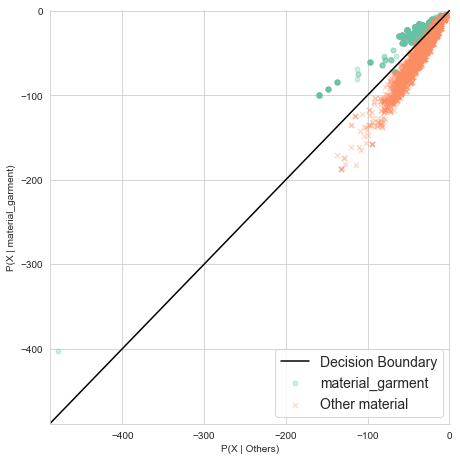

In [891]:
sns.lmplot(x = xaxis_label, y = yaxis_label, 
           data =summary_df, height = 6.5, 
           fit_reg=False, legend=False, scatter_kws={'alpha': 0.3, 's': 25}, 
           hue = labels, markers = ['o', 'x'], palette = 'Set2' )

plt.xlim([joint_log_ctg_1.min() - 10, 1])
plt.ylim([joint_log_ctg_1.min() - 10, 1])

plt.plot(linedata, linedata, color = 'black')

plt.legend(('Decision Boundary', SUBJECT , 'Other material'), 
           loc='lower right', fontsize = 14)

plt.show()

# False Positives and False Negatives
* The function up.unique() shows the nubmer of value 0 is 2347, the value 1 is 650.

In [892]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1303, 2949]))

### True positives
* It shows, the document is 1, the True, and model also predicts it as 1, True.
* In this case, the material is fabric in CATEGORY, and the prediction also say it is fabric.

In [893]:
true_pos = (y_test == 1)&(prediction == 1)

In [894]:
true_pos.sum()

2853

### True negatives
* It shows, the document is 0, the False, and the model also predicts it as 0, False.
* In this case, the material is actually trim in CATEGORY, and the prediction also say it is trim.

In [895]:
true_neg = (y_test == 0)&(prediction ==0)

In [896]:
true_neg.sum()

1145

### False positives
* It shows, the document is 0, the False, and model predicts it as 1, True.
* In this case, the material is trim in CATEGORY, and yet prediction says it is fabric.

In [897]:
false_pos = (y_test == 0)&(prediction ==1)

In [898]:
false_pos.sum()

96

### False negtives
* It shows, the document is 1, the True, and model predicts it as 0, False.
* In this case, the material is fabric in CATEGORY, and yet prediction says it is trim.

In [899]:
false_neg = (y_test == 1)&(prediction == 0)

In [900]:
false_neg.sum()

158

In [901]:
(y_test == 1).sum()

3012

# Recall Score
* It tells how much the model will omit the document. More the value close to 1, less the model will omit to fit document.
* It tells the reliability of the model, in other words, how much the model resemble to the relevant documents.
* More the value close to 1, less the model will omit any document.

In [902]:
recall_score = true_pos.sum() / (y_test == 1).sum()
print('Recall score is {:.2%}'. format(recall_score))

Recall score is 94.72%


# Precision Score
* It tells how precisely the model predicting.

In [903]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.967


# F-Score or F1 Score
* Closer the value to 1, better the model is.

In [904]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.96
